Tên: Cao Tuấn Anh  
MSSV: 19520008

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CS406.N11.KHCL/Baitap/Baitap1/images/

/content/drive/.shortcut-targets-by-id/1Dud2CQv6t7m_V1thbeNZKmRdRm_iaM_z/CS406.N11.KHCL/Baitap/Baitap1/images


#YC1: Đọc và hiển thị ảnh

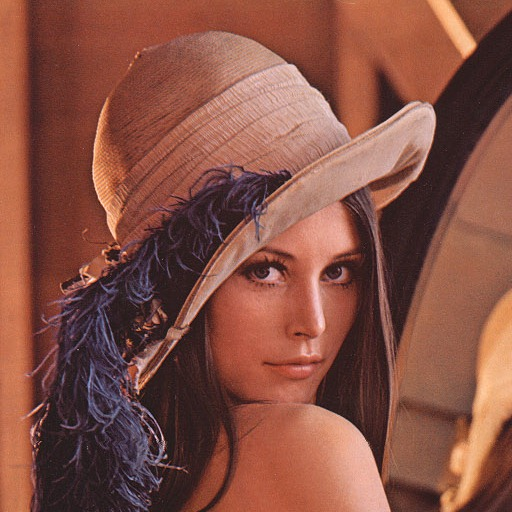

In [ ]:
image = cv2.imread('lena.jpg')
cv2_imshow(image)

Hiện thị ảnh với 3 thành phần màu: R G B

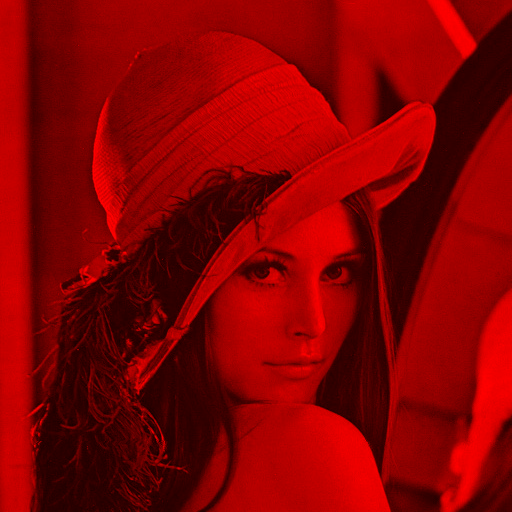

In [ ]:
# Red

r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0

cv2_imshow(r)

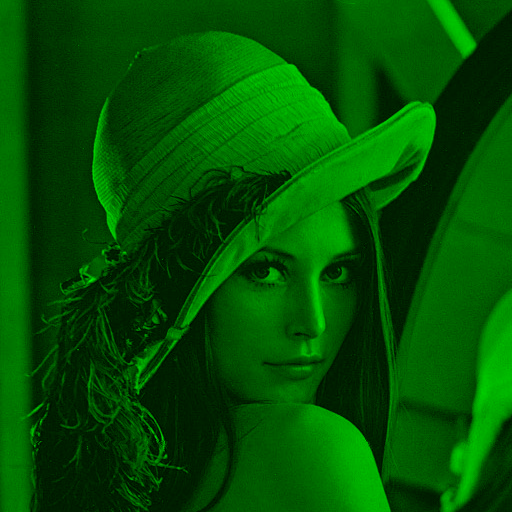

In [ ]:
# Green
g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

cv2_imshow(g)

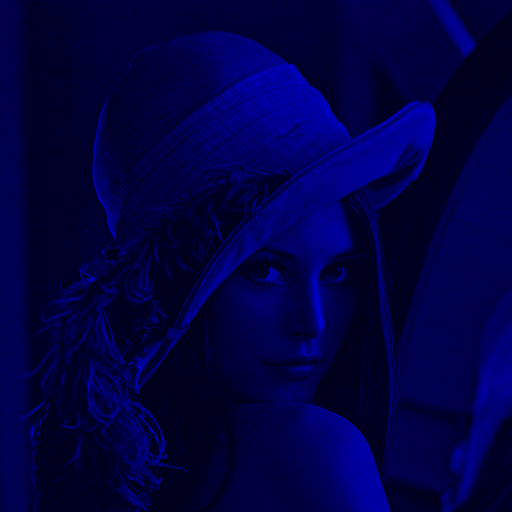

In [ ]:
# Blue

b = image.copy()
# set blue and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0

cv2_imshow(b)

Chuyển đổi ảnh sang ảnh mức xám và hiển thị ảnh kết quả

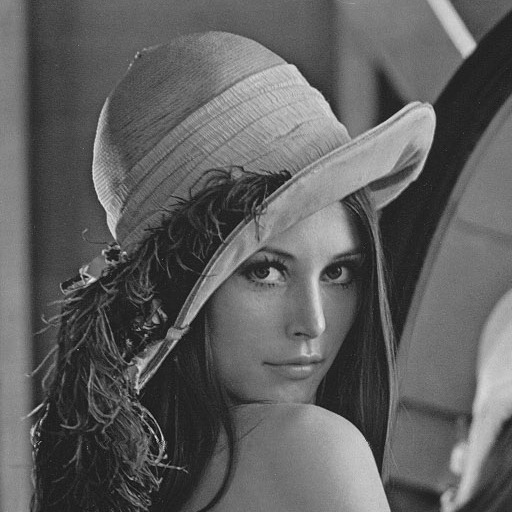

In [ ]:
imageG = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(imageG)

Chuyển đổi ảnh sang ảnh nhị phân và hiển thị ảnh kết quả

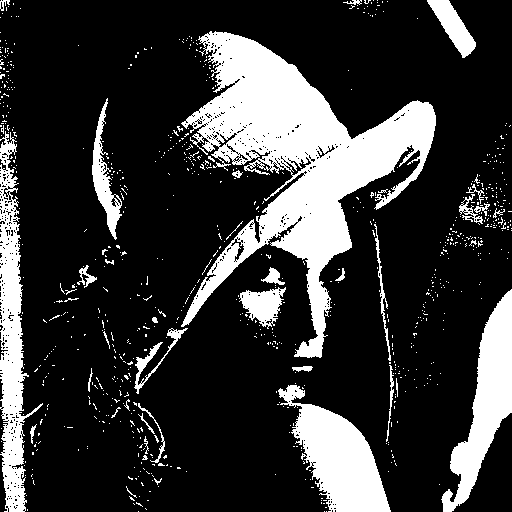

In [ ]:
def convert_bn(img, thresh=110):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    im_bw = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)[1]
    return im_bw

im_bw = convert_bn(image)
cv2_imshow(im_bw)

#YC2: Tăng độ sáng và độ tương phản (nhập khi thực thi) cho ảnh

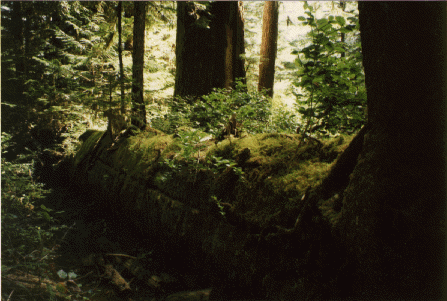

In [ ]:
image2 = cv2.imread('forest.tif')
cv2_imshow(image2)

Tăng độ sáng

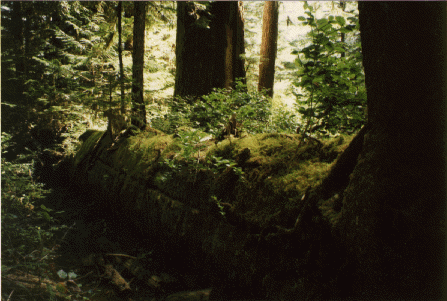

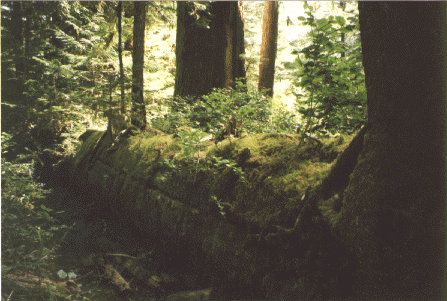

In [ ]:
import numpy as np
def change_brightness(img, alpha, beta):
    img_new = np.asarray(alpha*img + beta, dtype=int)   # cast pixel values to int
    img_new[img_new>255] = 255
    img_new[img_new<0] = 0
    return img_new

img_new = change_brightness(image2, 1.0, 35)
cv2_imshow(image2)
cv2_imshow(img_new)

Tăng độ tương phản

In [ ]:
def mapBrightAndContrast(bright, contrast):
  map = []
  for i in range(256):
    k = int( (i - 0.5) * contrast + 0.5 + bright)
    if k < 0:
      k = 0
    elif k > 255:
      k = 255
    map.append(k)

  return map

In [ ]:
def BrightAndContrast(img, bright = 0, contrast = 1):
  img_copy = img.copy()
  map = mapBrightAndContrast(bright, contrast)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      for k in range(img.shape[2]):
        img_copy[i][j][k] = map[img_copy[i][j][k]]
      
  return img_copy

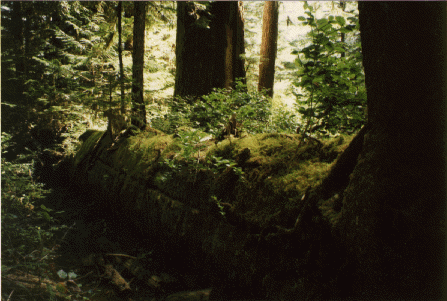

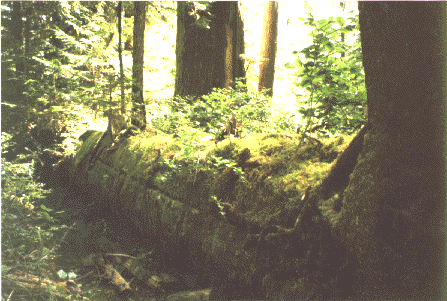

In [ ]:
upcontrast_img = BrightAndContrast(image2, 50, 1.7)
cv2_imshow(image2)
cv2_imshow(upcontrast_img)

#YC3: Áp dụng phép lấy ngưỡng cho ảnh

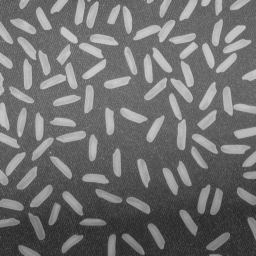

In [ ]:
image3 = cv2.imread('rice.png')
cv2_imshow(image3)

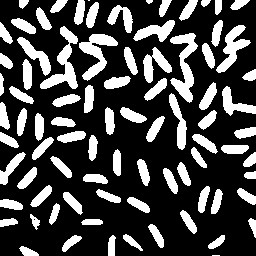

In [ ]:
def thresholdingImage(image, threshold):
  threshold = 120
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  image = cv2.medianBlur(image, 5)

  new_img = image.copy()
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if (image[i, j] > threshold):
        new_img[i, j] = 255
      else:
        new_img[i, j] = 0

  return new_img

rice_threshold = thresholdingImage(image3,120)
cv2_imshow(rice_threshold)

#YC4: Invert cho ảnh

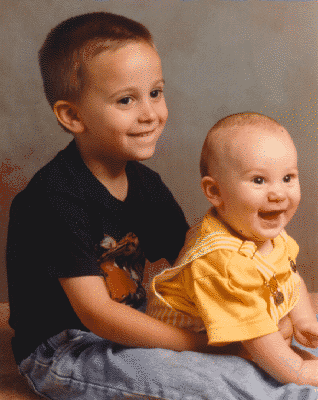

In [ ]:
image4 = cv2.imread('kids.tif')
cv2_imshow(image4)

In [ ]:
kid_img = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

(400, 318, 3)


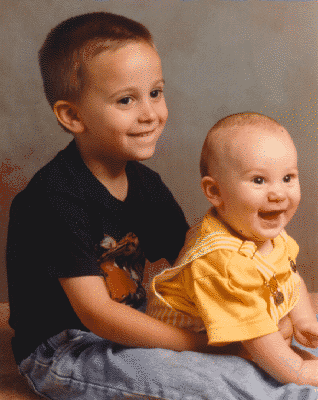

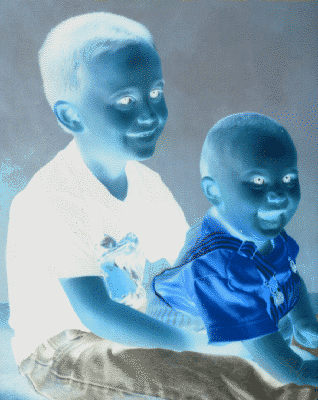

In [68]:
def invert(image):
  col, row, channel = image.shape 
  re_image = np.zeros((col, row, channel), dtype=np.uint8)
  print(re_image.shape)
  for c in range(channel):
    for h in range(col):
      for w in range(row):
        re_image[h, w, c] = 256 - 1 - image[h, w, c]
  return re_image.astype(np.uint8)

anh_invert = invert(image4)
cv2_imshow(image4)
cv2_imshow(anh_invert)